In [1]:

import tifffile,pickle
import os, glob
import pprint
import numpy as np
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
import scipy.ndimage as ndi
from skimage.transform import rescale


In [2]:


def pad(a,out_shape):
    """
    Return bottom right padding.
    assuming a is a 3-d array for now. 
    """
    assert(len(a.shape)==3)
    assert(len(a.shape)==len(out_shape))    
    out = np.zeros(out_shape)
    if np.product((np.array(out_shape)>=np.array(a.shape))).all():        
        out[:a.shape[0],:a.shape[1],:a.shape[2]] = a
    else:
        print("something went wrong")
    return out



**downsampling scale**

In [3]:
ds_scl = 1/2

**set base dir**

In [ ]:
# base_dir = '/home/ubuntu/largevolume2/massimo_xinxin/data/G130' # where the data is stored!
base_dir = 'where the data is'

# exvivo 

In [4]:
filepath = base_dir+'/exvivo_volume.pkl'
exvivo_vol = pickle.load(open(filepath,'rb'))
exvivo_vol = rescale(exvivo_vol, (1,ds_scl*1.5,ds_scl,ds_scl))
exvivo_vol.shape

(2, 48, 1517, 1618)

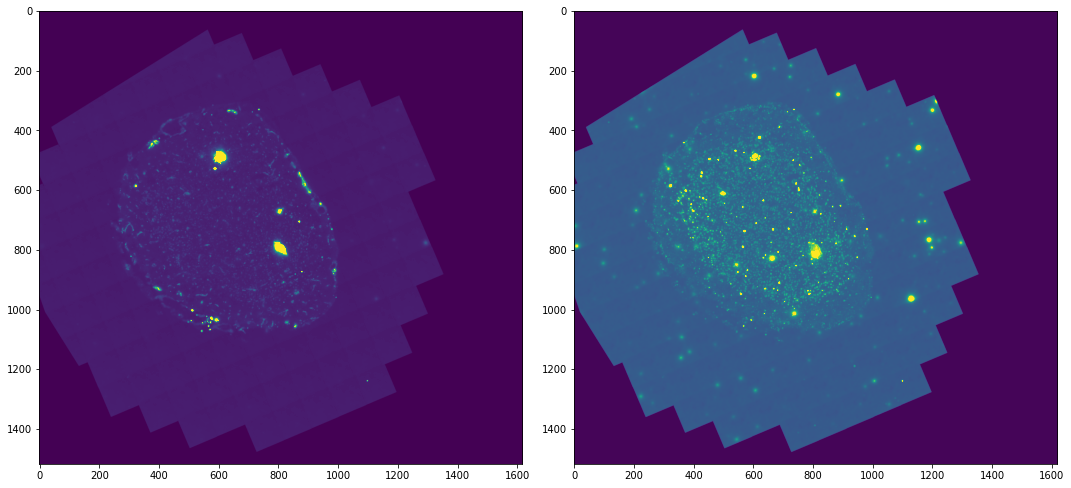

In [5]:
z = 20
plt.figure(figsize = (15,8))
plt.subplot(1,2,1);plt.imshow(exvivo_vol[0,z], vmax = exvivo_vol[0,z].max()*.1)
plt.subplot(1,2,2);plt.imshow(exvivo_vol[1,z], vmax = exvivo_vol[1,z].max()*.1)
plt.tight_layout()

In [6]:
save_img_name = base_dir + f'/rawdata_pkls/exvivo_{1/ds_scl}xds.pkl'
pickle.dump(exvivo_vol, open(save_img_name,'wb'))




# invivo 
( we will keep two channels and ignore the gcamp for now!)
## 0. first we have to decide the data shape since sometimes tdtomato and BV has different pix sizes. 

In [7]:
allfilepath = base_dir+'/static large zstack/*.tif'
datasize = []
for f in glob.glob(allfilepath):
    datasize.append(tifffile.imread(f).shape)
print(datasize)

out_shape = (np.ceil(np.max(np.array(datasize), 0)*ds_scl)).astype(int)
print(out_shape)

[(537, 1516, 1466), (424, 1568, 1454)]
[269 784 733]


## 1. tdtomato

In [8]:
filepath = base_dir+'/static large zstack/fused_tdTomato_1100nm.tif'

invivo_tomato = tifffile.imread(filepath)#y
print(invivo_tomato.shape)
invivo_tomato = ndi.zoom(invivo_tomato, ds_scl, order = 2)
print(invivo_tomato.shape)
invivo_tomato = pad(invivo_tomato,out_shape)
print(invivo_tomato.shape)

(424, 1568, 1454)
(212, 784, 727)
(269, 784, 733)


## 2. BV

In [9]:
filepath = base_dir+'/static large zstack/fused_BV.tif'
invivo_BV = tifffile.imread(filepath)#y
print(invivo_BV.shape)
invivo_BV = ndi.zoom(invivo_BV, ds_scl, order = 2)
print(invivo_BV.shape)
invivo_BV = pad(invivo_BV,out_shape)
print(invivo_BV.shape)

(537, 1516, 1466)
(268, 758, 733)
(269, 784, 733)


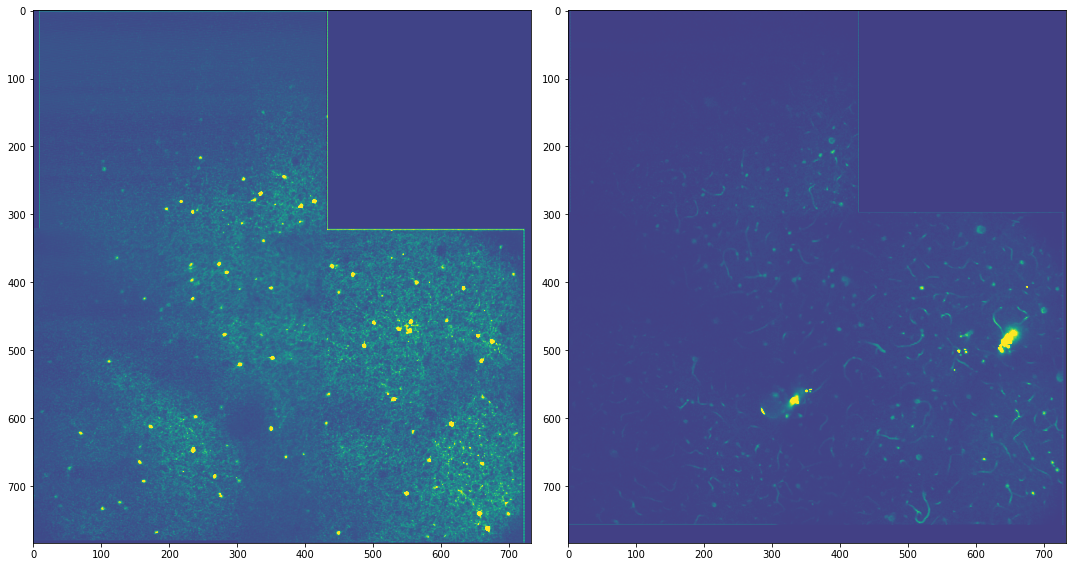

In [11]:
z = 100
plt.figure(figsize = (15,8))
plt.subplot(1,2,1);plt.imshow(invivo_tomato[z], vmax = invivo_tomato[z].max()*.1)
plt.subplot(1,2,2);plt.imshow(invivo_BV[z], vmax = invivo_BV[z].max()*.1)
plt.tight_layout()



## 3. save

In [10]:
invivo = np.concatenate((invivo_BV[None],invivo_tomato[None]), axis=0)
print(invivo.shape)

save_img_name = base_dir+ f'/rawdata_pkls/invivo_{1/ds_scl}xds.pkl'
pickle.dump(invivo, open(save_img_name,'wb'))


(2, 269, 784, 733)
